In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 14
import time, copy,os
from numpy import pi, sin, cos, tan
import control
from numpy.fft import fft
from control import TransferFunction as TF

In [4]:
import os

In [5]:
import pylab_util as PU

In [6]:
import serial

In [7]:
import serial_utils

In [8]:
import importlib

In [7]:
importlib.reload(serial_utils)

<module 'serial_utils' from '/home/ryanwkrauss/git/research/serial_utils.py'>

In [8]:
import re

In [9]:
p = re.compile("^[0-9.]+,.*")

In [10]:
def data_to_float_array(data):
    mylist = data.split('\n')

    for i, rowstr in enumerate(mylist):
        if p.search(rowstr) is not None:
            #this is the start row
            start_ind = i
            break
                
    # search backwards for '#end'
    N = len(mylist)
    for i in range(1,N):
        ind = N-i
        rowstr = mylist[ind]
        if p.search(rowstr) is not None:
            end_ind = ind
            break
    
    clean_list = mylist[start_ind:end_ind]
    clean_2 = list(filter(None,clean_list))
    nested_list = [row.split(',') for row in clean_2]
    str_array = np.array(nested_list)
    float_array = str_array.astype(float)
    return float_array

In [11]:
pwd

'/home/ryanwkrauss/sabbatical_github_work/arduino_oop_block_diagram'

In [12]:
ls /dev/tty*

/dev/tty  /dev/ttyACM0


## Get the portname

In [20]:
for i in range(10):
    portname = "/dev/ttyACM%i" % i
    if os.path.exists(portname):
        break
print("portname: %s" % portname)

portname: /dev/ttyACM1


In [21]:
ser = serial_utils.serial_test(portname)

In [22]:
ser.open()

In [24]:
ser.print_all()

digcomp library test rtbd v.1.1
using rtblockdiagram library
_len_in = 2
_len_out = 3
enter any character to start a test



In [25]:
ser.flush()

In [26]:
ser.write_char('s')

In [27]:
data = ser.get_data()

In [28]:
data2 = ser.get_data()

In [29]:
data += data2

In [30]:
print(data)

t0 =2176576
0.76,0,0,0.00
2.80,0,0,0.00
4.85,0,0,0.00
6.90,0,0,0.00
8.95,0,0,0.00
11.00,0,0,0.00
13.04,0,0,0.00
15.09,0,0,0.00
17.14,0,0,0.00
19.19,0,0,0.00
21.24,0,0,0.00
23.28,0,0,0.00
25.33,0,0,0.00
27.38,0,0,0.00
29.43,0,0,0.00
31.48,0,0,0.00
33.52,0,0,0.00
35.57,0,0,0.00
37.62,0,0,0.00
39.67,0,0,0.00
41.72,0,0,0.00
43.76,0,0,0.00
45.81,0,0,0.00
47.86,0,0,0.00
49.91,0,0,0.00
51.96,0,0,0.00
54.00,0,0,0.00
56.05,0,0,0.00
58.10,0,0,0.00
60.15,0,0,0.00
62.20,0,0,0.00
64.24,0,0,0.00
66.29,0,0,0.00
68.34,0,0,0.00
70.39,0,0,0.00
72.44,0,0,0.00
74.48,0,0,0.00
76.53,0,0,0.00
78.58,0,0,0.00
80.63,0,0,0.00
82.68,0,0,0.00
84.72,0,0,0.00
86.77,0,0,0.00
88.82,0,0,0.00
90.87,0,0,0.00
92.92,0,0,0.00
94.96,0,0,0.00
97.01,0,0,0.00
99.06,0,0,0.00
101.11,0,0,0.00
103.16,0,0,0.00
105.20,0,0,0.00
107.25,0,0,0.00
109.30,0,0,0.00
111.35,0,0,0.00
113.40,0,0,0.00
115.44,0,0,0.00
117.49,0,0,0.00
119.54,0,0,0.00
121.59,0,0,0.00
123.64,0,0,0.00
125.68,0,0,0.00
127.73,0,0,0.00
129.78,0,0,0.00
131.83,0,0,0.00
13

In [31]:
float_array = data_to_float_array(data)

In [32]:
t = float_array[:,0]

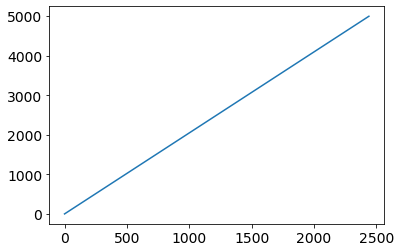

In [33]:
plt.figure()
plt.plot(t)

In [34]:
t[0:10]

array([ 0.76,  2.8 ,  4.85,  6.9 ,  8.95, 11.  , 13.04, 15.09, 17.14,
       19.19])

In [35]:
if t[0] > 50:
    t[0] = 0

In [36]:
v = float_array[:,1]
y = float_array[:,-1]
y_int = float_array[:,2]

(0.0, 2000.0)

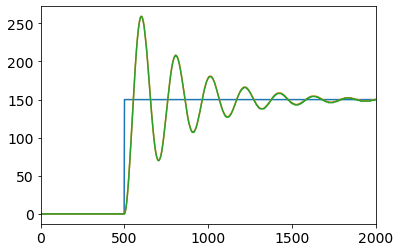

In [37]:
plt.figure()
plt.plot(t,v,t,y, t, y_int)
#plt.ylim([-5,260])
plt.xlim([0,2000])

## Compare to simulation

In [9]:
wn = 10*pi
z = 0.1

G = TF(wn**2,[1,2*wn*z,wn**2])
G

TransferFunction(array([986.96044011]), array([  1.        ,   6.28318531, 986.96044011]))

In [10]:
dt = 0.002

In [11]:
N = len(t)
nvect = np.arange(N)

NameError: name 't' is not defined

In [12]:
t_sec = dt*nvect

NameError: name 'nvect' is not defined

In [13]:
t2, y_sim = control.forced_response(G, t_sec, v)

NameError: name 't_sec' is not defined

In [14]:
plt.figure()
plt.plot(t,v,t,y)
plt.plot(t, y_int,'-.')
plt.plot(t,y_sim,'--')
#plt.ylim([-5,260])
plt.xlim([0,2000])

NameError: name 't' is not defined

<Figure size 432x288 with 0 Axes>

In [214]:
enc[340:420]

array([155., 155., 155., 155., 155., 156., 156., 156., 156., 156., 156.,
       156., 156., 156., 156., 156., 156., 156., 156., 156., 155., 155.,
       155., 155., 155., 155., 155., 155., 155., 155., 155., 155., 155.,
       155., 155., 155., 155., 155., 155., 155., 155., 155., 154., 154.,
       154., 154., 154., 154., 154., 154., 154., 154., 154., 154., 154.,
       154., 154., 154., 154., 154., 154., 154., 154., 154., 154., 154.,
       154., 154., 154., 154., 154., 154., 154., 154., 154., 154., 154.,
       154., 154., 154.])

In [215]:
t[4]-t[3]

2.05

In [216]:
np.where(t>750)[0][0]

349

In [217]:
ser.close()

In [218]:
data_out = np.column_stack([t,v_sat,enc])

In [220]:
np.savetxt(fn,data_out,delimiter=',')

## Digcomp feedback

In [15]:
part1 = TF([0.1,30],1)
part1

TransferFunction(array([ 0.1, 30. ]), array([1]))

In [16]:
p = 900
part2 = TF(p,[1,p])

In [17]:
D = part1*part2
D

TransferFunction(array([   90., 27000.]), array([  1, 900]))

In [18]:
import digcomp

In [19]:
Dz = digcomp.Dig_Comp_from_ctime(D,0.002)
Dz

In [20]:
Dz.num

array([ 61.57894737, -33.15789474])

In [21]:
Dz.den

array([ 1.        , -0.05263158])

In [22]:
def ndarray_to_arduino_string(array_in):
    outstr = "{"
    first = 1
    for ent in array_in:
        if first:
            first = 0
        else:
            outstr += ', '
        nextstr = "%0.10g" % ent
        outstr += nextstr
    outstr += '};'
    return outstr

In [23]:
ndarray_to_arduino_string(Dz.num)

'{61.57894737, -33.15789474};'